In [1]:
# importing necessary libraries for data processing, model creation and training, and evaluation metrics. 
# i'm using a neural network to try and predict if the favorite has covered or the underdog covered 
# with using a neural network it can take in weights and biases to provide a more accurate training loss and score of the model
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# loading in the dataset and looking at the head values
data = pd.read_csv('/Users/zahidlaguna/Downloads/nba_2008-2024.csv')
data.head()

,season,date,regular,playoffs,away,home,score_away,score_home,q1_away,q2_away,...,ot_home,whos_favored,spread,total,moneyline_away,moneyline_home,h2_spread,h2_total,id_spread,id_total
0,2008,2007-10-30,True,False,por,sa,97,106,26,23,...,0,home,13.0,189.5,900.0,-1400.0,5.0,95.0,0.0,1.0
1,2008,2007-10-30,True,False,utah,gs,117,96,28,34,...,0,home,1.0,212.0,100.0,-120.0,3.0,105.5,0.0,1.0
2,2008,2007-10-30,True,False,hou,lal,95,93,16,27,...,0,away,5.0,199.0,-230.0,190.0,3.0,99.0,0.0,0.0
3,2008,2007-10-31,True,False,phi,tor,97,106,22,28,...,0,home,6.5,191.0,255.0,-305.0,2.0,96.5,1.0,1.0
4,2008,2007-10-31,True,False,wsh,ind,110,119,23,22,...,16,away,1.5,203.5,-125.0,105.0,1.0,105.0,0.0,1.0


In [3]:
# exploring the data finding it's shape and information datatype
print(data.shape)
data.info()

(21797, 27)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21797 entries, 0 to 21796
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          21797 non-null  int64  
 1   date            21797 non-null  object 
 2   regular         21797 non-null  bool   
 3   playoffs        21797 non-null  bool   
 4   away            21797 non-null  object 
 5   home            21797 non-null  object 
 6   score_away      21797 non-null  int64  
 7   score_home      21797 non-null  int64  
 8   q1_away         21797 non-null  int64  
 9   q2_away         21797 non-null  int64  
 10  q3_away         21797 non-null  int64  
 11  q4_away         21797 non-null  int64  
 12  ot_away         21797 non-null  int64  
 13  q1_home         21797 non-null  int64  
 14  q2_home         21797 non-null  int64  
 15  q3_home         21797 non-null  int64  
 16  q4_home         21797 non-null  int64  
 17  ot_home         217

In [4]:
# statistical summary of the values
data.describe()

,season,score_away,score_home,q1_away,q2_away,q3_away,q4_away,ot_away,q1_home,q2_home,...,q4_home,ot_home,spread,total,moneyline_away,moneyline_home,h2_spread,h2_total,id_spread,id_total
count,21797.000000,21797.000000,21797.000000,21797.000000,21797.000000,21797.000000,21797.000000,21797.000000,21797.000000,21797.000000,...,21797.000000,21797.000000,21790.000000,21793.000000,19820.000000,19820.000000,19822.000000,19817.000000,21790.000000,21793.000000
mean,2015.985273,103.412029,106.105427,25.884021,25.979538,25.575951,25.296050,0.676469,26.790476,26.658072,...,25.671239,0.718126,6.107343,209.206580,124.229263,-254.547780,3.576716,103.027330,0.523313,0.515257
std,4.916770,13.585591,13.475615,5.921943,5.869219,5.992875,5.957012,3.066466,5.954406,5.893238,...,5.867762,3.216953,3.650443,15.217943,430.106555,680.035795,2.579336,7.077542,0.529356,0.523896
min,2008.000000,54.000000,59.000000,7.000000,4.000000,5.000000,5.000000,0.000000,5.000000,5.000000,...,7.000000,0.000000,0.000000,170.000000,-9900.000000,-13000.000000,0.000000,84.000000,0.000000,0.000000
25%,2012.000000,94.000000,97.000000,22.000000,22.000000,21.000000,21.000000,0.000000,23.000000,23.000000,...,22.000000,0.000000,3.000000,197.000000,-140.000000,-340.000000,1.500000,97.500000,0.000000,0.000000
50%,2016.000000,103.000000,106.000000,26.000000,26.000000,25.000000,25.000000,0.000000,27.000000,27.000000,...,26.000000,0.000000,5.500000,209.000000,145.000000,-170.000000,3.000000,103.000000,1.000000,1.000000
75%,2020.000000,112.000000,115.000000,30.000000,30.000000,30.000000,29.000000,0.000000,31.000000,31.000000,...,30.000000,0.000000,8.500000,221.000000,280.000000,120.000000,5.000000,108.000000,1.000000,1.000000
max,2024.000000,176.000000,175.000000,55.000000,49.000000,51.000000,51.000000,44.000000,55.000000,51.000000,...,49.000000,41.000000,23.000000,262.500000,6500.000000,3000.000000,16.500000,125.000000,2.000000,2.000000


In [5]:
# properly formatted the dates in the dataset
data['date'] = pd.to_datetime(data['date'], errors='coerce')

In [6]:
# any null values in the dataset
data.isna().sum()

season               0
date                 0
regular              0
playoffs             0
away                 0
home                 0
score_away           0
score_home           0
q1_away              0
q2_away              0
q3_away              0
q4_away              0
ot_away              0
q1_home              0
q2_home              0
q3_home              0
q4_home              0
ot_home              0
whos_favored         4
spread               7
total                4
moneyline_away    1977
moneyline_home    1977
h2_spread         1975
h2_total          1980
id_spread            7
id_total             4
dtype: int64

In [7]:
# dropping the null values, and creating a clean dataset 
data_clean = data.dropna(subset=['spread', 'whos_favored', 'score_away', 'score_home'])

In [8]:
#function that creates a classification of the outcomes by taking the home/away score and subtracting from the spread
# 1 = the favorite had covered, 0 = the underdog has covered, if neither covered then the else will be called for push 
def classify_outcome(row):
    if row['whos_favored'] == 'home':
        spread_diff = row['score_home'] - row['score_away'] - row['spread']
    else:
        spread_diff = row['score_away'] - row['score_home'] - row['spread']
    
    if spread_diff > 0:
        return 'favorite_covered'
    elif spread_diff < 0:
        return 'underdog_covered'
    else:
        return 'push'

In [9]:
# taking the outcome of the clean dataset and renaming the column to outcome
# extracting the features for training 
# setting the X and Y values
data_clean['outcome'] = data_clean.apply(classify_outcome, axis=1)
features = ['score_away', 'score_home', 'spread', 'moneyline_away', 'moneyline_home', 'h2_spread', 'h2_total']
data_model = data_clean.dropna(subset=features)
X = data_model[features]
y = data_model['outcome']

/var/folders/fv/y6x7n7ls3g901b1zd6v7_g480000gn/T/ipykernel_34080/157156562.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['outcome'] = data_clean.apply(classify_outcome, axis=1)


In [10]:
# splitting the dataset into train and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
# scaling the data for better training and transforming the X test and trained to fit in the scaled value 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
# since the outcome is a classification we would have to encode our outcomes(y values) into binary labels 
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.fit_transform(y_test)

In [13]:
# the dataset becomes tensors by being transformed 
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_encoded, dtype=torch.int64)
y_test_tensor = torch.tensor(y_test_encoded, dtype=torch.int64)

In [14]:
# the class function is created to create our hidden layers and activation functions
# the input function starts off as linear with a batch size of 64 and gradually passes through with a batch size of 32
# the forward pass function uses a relu activation function 
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.layer1 = nn.Linear(X_train_tensor.shape[1], 64)
        self.layer2 = nn.Linear(64, 32)
        self.output = nn.Linear(32, len(label_encoder.classes_))
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.output(x)
        return x


In [15]:
# the model module 
model = NeuralNetwork()

In [16]:
# loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [17]:
train_data = TensorDataset(X_train_tensor, y_train_tensor)
test_data = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

In [18]:
# an empty list of losses that whn passed takes in all the loss function values and returns them as a list 
losses = []

In [19]:
# the number of epochs in training
# the function loops through each epoch and returns the loss value 
epochs = 20
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    avg_loss = running_loss / len(train_loader)
    losses.append(avg_loss)
    print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_loss}")

Epoch 1/20, Loss: 0.6216522598046861
Epoch 2/20, Loss: 0.3040727199085297
Epoch 3/20, Loss: 0.18648565059295996
Epoch 4/20, Loss: 0.15061232337753894
Epoch 5/20, Loss: 0.13567664424463902
Epoch 6/20, Loss: 0.1270842916044634
Epoch 7/20, Loss: 0.11991457459152019
Epoch 8/20, Loss: 0.11718002009776331
Epoch 9/20, Loss: 0.11444466897556858
Epoch 10/20, Loss: 0.11071559600961235
Epoch 11/20, Loss: 0.1061971040082074
Epoch 12/20, Loss: 0.10478719831165355
Epoch 13/20, Loss: 0.10380828235521569
Epoch 14/20, Loss: 0.10133065077720836
Epoch 15/20, Loss: 0.09769216522763265
Epoch 16/20, Loss: 0.09774849297315706
Epoch 17/20, Loss: 0.0958794170029221
Epoch 18/20, Loss: 0.09295638846791422
Epoch 19/20, Loss: 0.09169913323227025
Epoch 20/20, Loss: 0.09152620073734066


In [20]:
# the model evaluation from batch training 
model.eval()
y_pred_list = []
with torch.no_grad():
    for X_batch, _ in test_loader:
        outputs = model(X_batch)
        _, predicted = torch.max(outputs, 1)
        y_pred_list.extend(predicted.cpu().numpy())

In [21]:
# the prediction being transformed to binary labels 
y_pred = label_encoder.inverse_transform(y_pred_list)

In [22]:
#accuracy score from final training
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 96.55%


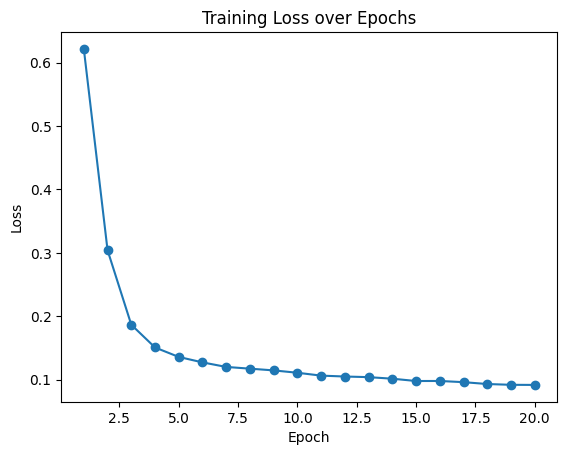

In [23]:
# graph showing the training loss as it iterates through each epoch
plt.plot(range(1, epochs + 1), losses, marker='o')
plt.title('Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [24]:
# classification report for metric accuracy 
classification_report_result = classification_report(y_test, y_pred)
print(classification_report_result)

                  precision    recall  f1-score   support

favorite_covered       0.99      0.97      0.98      2908
            push       0.00      0.00      0.00        98
underdog_covered       0.94      0.99      0.97      2938

        accuracy                           0.97      5944
       macro avg       0.64      0.65      0.65      5944
    weighted avg       0.95      0.97      0.96      5944



/Users/zahidlaguna/.pyenv/versions/3.10.8/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/zahidlaguna/.pyenv/versions/3.10.8/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/zahidlaguna/.pyenv/versions/3.10.8/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

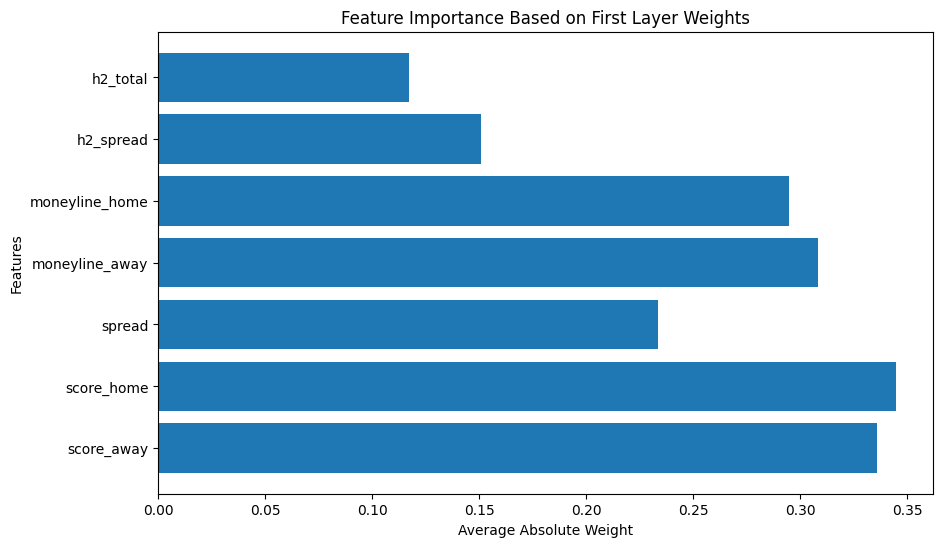

In [25]:
#the importance of each feature from training 
first_layer_weights = model.layer1.weight.detach().numpy()
feature_importance = np.mean(np.abs(first_layer_weights), axis=0)

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importance)
plt.title('Feature Importance Based on First Layer Weights')
plt.xlabel('Average Absolute Weight')
plt.ylabel('Features')
plt.show()